<a href="https://colab.research.google.com/github/yashcoder007/100-days-of-machine-learning/blob/main/Copy_of_Security_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import torch
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
!pip install pygod
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
import torch.nn.functional as F
from torch_geometric.data import Data
from torch.utils.tensorboard import SummaryWriter
from torch_geometric.utils import train_test_split_edges
import tensorflow as tf
from tensorboard import notebook
%load_ext tensorboard
%tensorboard --logdir /content/runs --port 6007

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 555.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygod: filename=pygod-1.0.0-py3-none-any.whl size=70677 sha256=f8a0af54e256225660c9e1d790c3b6037ebbf9d9c921df5b570910b5f5ed2680
  Stored in directory: /root/.cache/pip/wheels/19/4f/5e/d4a08c3476915cb8021462fe4129680c598ebce8b100f59ecf
Successfully built pygod
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
#Reading the data of the csv file
x = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/out.csv")

In [6]:
x.columns = ["ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p" , "proto", "service", "duration", "orig_bytes", "resp_bytes", "conn_state", "local_orig", "local_resp", "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes", "tunnel_parents", "community_id"]

In [7]:
x

ts                 uid                  id.orig_h  id.orig_p  \
0     1.499083e+09  CKmJ2S1DeEKRm5DQll              192.168.10.14      49486   
1     1.499083e+09  CxQ5nr3KyM41k4pdBc               192.168.10.9       1031   
2     1.499083e+09   C3Hbu2lgUN2cWNSOc               192.168.10.9       1032   
3     1.499083e+09  CnivVA4KfVMGjk0YVe               192.168.10.9       1033   
4     1.499083e+09  CtUeuu12Rt0TEox2l2               192.168.10.9       1034   
5     1.499083e+09   CtTgiv94Y34Eq1RK4               192.168.10.9       1036   
6     1.499083e+09  CgDHVT19amvLdkNXTb               192.168.10.9       1035   
7     1.499083e+09  CVPrw41Zj2SUpAhHbl               192.168.10.9      60372   
8     1.499083e+09   C9hLZ827hQNgxoDn9               192.168.10.9      63683   
9     1.499083e+09  CqucvC4BnoM50NUdU2               192.168.10.9      63276   
10    1.499083e+09  CfqHnw1e7iUKjoFXj7               192.168.10.9      56368   
11    1.499083e+09  CgEJ2b3DVh5E8DkNl6               192.168.10.9      62882   
12    1.499083e+09  C2IzVu4sjhATT0aRF1               192.168.10.9      65439   
13    1.499083e+09  CYz2o74pRsHhnFUqc6               192.168.10.3      61995   
14    1.499083e+09  CQqvB930JNXO70tl0a   fe80::3109:ba1d:7470:7dd      51128   
15    1.499083e+09  CIHqZe3UXQ7hV4muul               192.168.10.3      51128   
16    1.499083e+09  CCsdYc3PfEghQkp3qc   fe80::3109:ba1d:7470:7dd      53761   
17    1.499083e+09  CAfou71t8BvHYqE5W3   fe80::3109:ba1d:7470:7dd      59388   
18    1.499083e+09  CqItDb2iwwXr13sedc               192.168.10.3      59388   
19    1.499083e+09   COYNZ2c6gm2xcfi7e               192.168.10.3      53761   
20    1.499083e+09  C1L5Xf1SNUxEnbgKrh   fe80::3109:ba1d:7470:7dd      56697   
21    1.499083e+09   CG4hdouThTBqmN7va               192.168.10.3      56697   
22    1.499083e+09   CuaV1on7PNu0z8lvf   fe80::3109:ba1d:7470:7dd      50146   
23    1.499083e+09  ChN2N42zC3reBt1WGd               192.168.10.3      50146   
24    1.499083e+09  CCRpjb3ZFL41ytvfb9   fe80::3109:ba1d:7470:7dd      50672   
25    1.499083e+09  Clt8S84rLUOu6qt47j               192.168.10.3      50672   
26    1.499083e+09  CS1kw42m3J8Bmw1M36               192.168.10.9       1038   
27    1.499083e+09   CvXlkK2az3K2nIm1o               192.168.10.9       1039   
28    1.499083e+09   C6TsD4BU9bCPPcgYi               192.168.10.9       1040   
29    1.499083e+09  ChURZf4gE0MOcv94N3               192.168.10.9       1030   
30    1.499083e+09  C0hZr54jKZsCItsb17               192.168.10.9      52504   
31    1.499083e+09   CPcYWA3OxnOfevUPJ               192.168.10.9      49474   
32    1.499083e+09  CcYg5E29UxVBMg5WMc               192.168.10.9      55146   
33    1.499083e+09   C1GaPZGjrxwDlvvDa               192.168.10.9      55641   
34    1.499083e+09  Cis4Co1kPuHexVkQgb               192.168.10.3        137   
35    1.499083e+09  CO4R3d49gIOIgyJR8d               192.168.10.9       1045   
36    1.499083e+09  CryNRh3ailHE3pX0qe               192.168.10.9       1046   
37    1.499083e+09   CNWReYruXCk8Sq4A7               192.168.10.9       1047   
38    1.499083e+09  CBLU1o3tl7NsfO0cK6               192.168.10.9       1050   
39    1.499083e+09  CcsvlS1n19ZIytLet6               192.168.10.9       1052   
40    1.499083e+09  CkLQXj4OWxaZeEaTz4               192.168.10.9       1053   
41    1.499083e+09   CdAeNk3stoSIJNGIC               192.168.10.9       1051   
42    1.499083e+09  CIPLo34aaT09iYmZ95               192.168.10.9       1055   
43    1.499083e+09  C6hW4t2R7VkPOhGXP6               192.168.10.9       1056   
44    1.499083e+09  CJ3t1a2LMp8Qs3Sz1k               192.168.10.9       1057   
45    1.499083e+09   CgUuZTn3fkGWOjUHd               192.168.10.9      58052   
46    1.499083e+09  CgkT4m47Wbrll5t9sf   fe80::3109:ba1d:7470:7dd      58156   
47    1.499083e+09  CAJGTD3a9k4b1ENGmg               192.168.10.3      58156   
48    1.499083e+09  C9NYOl33sQ3OVfH5Va               192.168.10.9      54502   
49    1.499083e+

In [9]:
#Checking the statistics of all numeric features
x.describe()

ts     id.orig_p     id.resp_p  missed_bytes    orig_pkts  \
count  1.337000e+03   1337.000000   1337.000000  1.337000e+03  1337.000000   
mean   1.499083e+09  32904.952132    682.978310  2.914003e+03     9.291698   
std    1.160876e+02  24209.834507   3049.444499  5.883628e+04    38.981861   
min    1.499083e+09      3.000000      0.000000  0.000000e+00     0.000000   
25%    1.499083e+09   5353.000000     53.000000  0.000000e+00     2.000000   
50%    1.499083e+09  37867.000000     53.000000  0.000000e+00     2.000000   
75%    1.499083e+09  56530.000000    123.000000  0.000000e+00     4.000000   
max    1.499083e+09  65521.000000  49671.000000  1.964063e+06   984.000000   

       orig_ip_bytes  resp_ip_bytes  tunnel_parents  
count    1336.000000   1.336000e+03             0.0  
mean     1067.869760   3.267477e+03             NaN  
std      4025.748683   4.930780e+04             NaN  
min         0.000000   0.000000e+00             NaN  
25%       120.000000   1.387500e+02             NaN  
50%       144.000000   2.440000e+02             NaN  
75%       470.750000   2.965000e+02             NaN  
max     63820.000000   1.621270e+06             NaN

In [10]:
# Exploring the ts (Date) column and converting it to readable format
x['ts'] = pd.to_datetime(x['ts'], format='%Y-%m-%d %H:%M:%S.%f')

In [11]:
x

ts                 uid  \
0    1970-01-01 00:00:01.499082982  CKmJ2S1DeEKRm5DQll   
1    1970-01-01 00:00:01.499082998  CxQ5nr3KyM41k4pdBc   
2    1970-01-01 00:00:01.499082998   C3Hbu2lgUN2cWNSOc   
3    1970-01-01 00:00:01.499082998  CnivVA4KfVMGjk0YVe   
4    1970-01-01 00:00:01.499082998  CtUeuu12Rt0TEox2l2   
5    1970-01-01 00:00:01.499082998   CtTgiv94Y34Eq1RK4   
6    1970-01-01 00:00:01.499082998  CgDHVT19amvLdkNXTb   
7    1970-01-01 00:00:01.499082997  CVPrw41Zj2SUpAhHbl   
8    1970-01-01 00:00:01.499082997   C9hLZ827hQNgxoDn9   
9    1970-01-01 00:00:01.499082997  CqucvC4BnoM50NUdU2   
10   1970-01-01 00:00:01.499082997  CfqHnw1e7iUKjoFXj7   
11   1970-01-01 00:00:01.499082997  CgEJ2b3DVh5E8DkNl6   
12   1970-01-01 00:00:01.499082998  C2IzVu4sjhATT0aRF1   
13   1970-01-01 00:00:01.499082999  CYz2o74pRsHhnFUqc6   
14   1970-01-01 00:00:01.499082999  CQqvB930JNXO70tl0a   
15   1970-01-01 00:00:01.499082999  CIHqZe3UXQ7hV4muul   
16   1970-01-01 00:00:01.499083001  CCsdYc3PfEghQkp3qc   
17   1970-01-01 00:00:01.499083001  CAfou71t8BvHYqE5W3   
18   1970-01-01 00:00:01.499083001  CqItDb2iwwXr13sedc   
19   1970-01-01 00:00:01.499083001   COYNZ2c6gm2xcfi7e   
20   1970-01-01 00:00:01.499083001  C1L5Xf1SNUxEnbgKrh   
21   1970-01-01 00:00:01.499083001   CG4hdouThTBqmN7va   
22   1970-01-01 00:00:01.499083001   CuaV1on7PNu0z8lvf   
23   1970-01-01 00:00:01.499083001  ChN2N42zC3reBt1WGd   
24   1970-01-01 00:00:01.499083001  CCRpjb3ZFL41ytvfb9   
25   1970-01-01 00:00:01.499083001  Clt8S84rLUOu6qt47j   
26   1970-01-01 00:00:01.499083006  CS1kw42m3J8Bmw1M36   
27   1970-01-01 00:00:01.499083006   CvXlkK2az3K2nIm1o   
28   1970-01-01 00:00:01.499083006   C6TsD4BU9bCPPcgYi   
29   1970-01-01 00:00:01.499082998  ChURZf4gE0MOcv94N3   
30   1970-01-01 00:00:01.499083005  C0hZr54jKZsCItsb17   
31   1970-01-01 00:00:01.499083005   CPcYWA3OxnOfevUPJ   
32   1970-01-01 00:00:01.499083005  CcYg5E29UxVBMg5WMc   
33   1970-01-01 00:00:01.499083005   C1GaPZGjrxwDlvvDa   
34   1970-01-01 00:00:01.499083001  Cis4Co1kPuHexVkQgb   
35   1970-01-01 00:00:01.499083018  CO4R3d49gIOIgyJR8d   
36   1970-01-01 00:00:01.499083018  CryNRh3ailHE3pX0qe   
37   1970-01-01 00:00:01.499083018   CNWReYruXCk8Sq4A7   
38   1970-01-01 00:00:01.499083018  CBLU1o3tl7NsfO0cK6   
39   1970-01-01 00:00:01.499083018  CcsvlS1n19ZIytLet6   
40   1970-01-01 00:00:01.499083018  CkLQXj4OWxaZeEaTz4   
41   1970-01-01 00:00:01.499083018   CdAeNk3stoSIJNGIC   
42   1970-01-01 00:00:01.499083019  CIPLo34aaT09iYmZ95   
43   1970-01-01 00:00:01.499083019  C6hW4t2R7VkPOhGXP6   
44   1970-01-01 00:00:01.499083021  CJ3t1a2LMp8Qs3Sz1k   
45   1970-01-01 00:00:01.499083018   CgUuZTn3fkGWOjUHd   
46   1970-01-01 00:00:01.499083018  CgkT4m47Wbrll5t9sf   
47   1970-01-01 00:00:01.499083018  CAJGTD3a9k4b1ENGmg   
48   1970-01-01 00:00:01.499083018  C9NYOl33sQ3OVfH5Va   
49   1970-01-01 00:00:01.499083018   CZGSe1Bq054IIfvrk   
50   1970-01-01 00:00:01.499083019   CTv3bOuPBNW0F90dj   
51   1970-01-01 00:00:01.499083019  CshOum4wIQbiQsHuCc   
52   1970-01-01 00:00:01.499082998  CMEHfa2mk0gfrtZix2   
53   1970-01-01 00:00:01.499083018  CNFtsv2pdCYhCkltxd   
54   1970-01-01 00:00:01.499083024  CLnPxR2t3YuKez9Pwb   
55   1970-01-01 00:00:01.499083025  CFdR562X4ZwkHcQdT5   
56   1970-01-01 00:00:01.499083025  CK34WV2IrInMocSSqh   
57   1970-01-01 00:00:01.499083021  CbZX5b4Fqq7Dhb8azl   
58   1970-01-01 00:00:01.499083021  C3AzSo4wJ7RckAXSCc   
59   1970-01-01 00:00:01.499083021   Ccnxc2A4dI1szWnPk   
60   1970-01-01 00:00:01.499083021  ChJuxj37rQPYk0GTC5   
61   1970-01-01 00:00:01.499083015  Ce2nC52d3seSZ42T03   
62   1970-01-01 00:00:01.499083015   CkvudBDsfnpSty2B1   
63   1970-01-01 00:00:01.499083025  ChDChq1te33ZB5Hjzg   
64   1970-01-01 00:00:01.499083025  CVUQnT3AglfR1eI9kl   
65   1970-01-01 00:00:01.499083018  CiJ9IW1j8lT66ysyc1   
66   1970-01-01 00:00:01.499083025   CbzsRLjSbU4IVeuOd   
67   1970-01-01 00:00:01.499083025  CuCdHl3WgCVunPeEsk   
68   1970-01-01 00:00:01.49908

In [12]:
#saving the host and the reciever connection data in a seperate dataframe
x_1 = x[['id.orig_h', 'id.resp_h']]

In [13]:
x_1

id.orig_h          id.resp_h
0                 192.168.10.14      8.253.185.121
1                  192.168.10.9       192.168.10.3
2                  192.168.10.9       192.168.10.3
3                  192.168.10.9       192.168.10.3
4                  192.168.10.9       192.168.10.3
5                  192.168.10.9       192.168.10.3
6                  192.168.10.9       192.168.10.3
7                  192.168.10.9        224.0.0.252
8                  192.168.10.9       192.168.10.3
9                  192.168.10.9       192.168.10.3
10                 192.168.10.9       192.168.10.3
11                 192.168.10.9       192.168.10.3
12                 192.168.10.9       192.168.10.3
13                 192.168.10.3       192.168.10.1
14     fe80::3109:ba1d:7470:7dd          ff02::1:3
15                 192.168.10.3        224.0.0.252
16     fe80::3109:ba1d:7470:7dd          ff02::1:3
17     fe80::3109:ba1d:7470:7dd          ff02::1:3
18                 192.168.10.3        224.0.0.252
19                 192.168.10.3        224.0.0.252
20     fe80::3109:ba1d:7470:7dd          ff02::1:3
21                 192.168.10.3        224.0.0.252
22     fe80::3109:ba1d:7470:7dd          ff02::1:3
23                 192.168.10.3        224.0.0.252
24     fe80::3109:ba1d:7470:7dd          ff02::1:3
25                 192.168.10.3        224.0.0.252
26                 192.168.10.9       192.168.10.3
27                 192.168.10.9       192.168.10.3
28                 192.168.10.9       192.168.10.3
29                 192.168.10.9       192.168.10.3
30                 192.168.10.9       192.168.10.3
31                 192.168.10.9       192.168.10.3
32                 192.168.10.9       192.168.10.3
33                 192.168.10.9       192.168.10.3
34                 192.168.10.3       192.168.10.1
35                 192.168.10.9       192.168.10.3
36                 192.168.10.9       192.168.10.3
37                 192.168.10.9       192.168.10.3
38                 192.168.10.9       192.168.10.3
39                 192.168.10.9       192.168.10.3
40                 192.168.10.9       192.168.10.3
41                 192.168.10.9       192.168.10.3
42                 192.168.10.9       192.168.10.3
43                 192.168.10.9       192.168.10.3
44                 192.168.10.9       69.31.33.224
45                 192.168.10.9        224.0.0.252
46     fe80::3109:ba1d:7470:7dd          ff02::1:3
47                 192.168.10.3        224.0.0.252
48                 192.168.10.9       192.168.10.3
49                 192.168.10.3       192.168.10.1
50                 192.168.10.9       192.168.10.3
51                 192.168.10.3       192.168.10.1
52                 192.168.10.9       192.168.10.3
53                 192.168.10.9       192.168.10.3
54                 192.168.10.9       192.168.10.3
55                 192.168.10.9       192.168.10.3
56                 192.168.10.9       192.168.10.3
57                 192.168.10.9       192.168.10.3
58                 192.168.10.3       192.168.10.1
59                 192.168.10.9       192.168.10.3
60                 192.168.10.3       192.168.10.1
61                 192.168.10.9       192.168.10.3
62                 192.168.10.9       192.168.10.3
63                 192.168.10.9       192.168.10.3
64                 192.168.10.9       192.168.10.3
65                 192.168.10.9       192.168.10.3
66                 192.168.10.9       192.168.10.3
67                 192.168.10.9       192.168.10.3
68                 192.168.10.9       192.168.10.3
69                 192.168.10.9       192.168.10.3
70                 192.168.10.9     192.168.10.255
71                 192.168.10.9       192.168.10.3
72                192.168.10.12       192.168.10.3
73                192.168.10.12       192.168.10.3
74                 192.168.10.3       192.168.10.1
75                192.168.10.12       192.168.10.3
76                 192.168.10.3       192.168.10.1
77                192.168.10.12       192.16

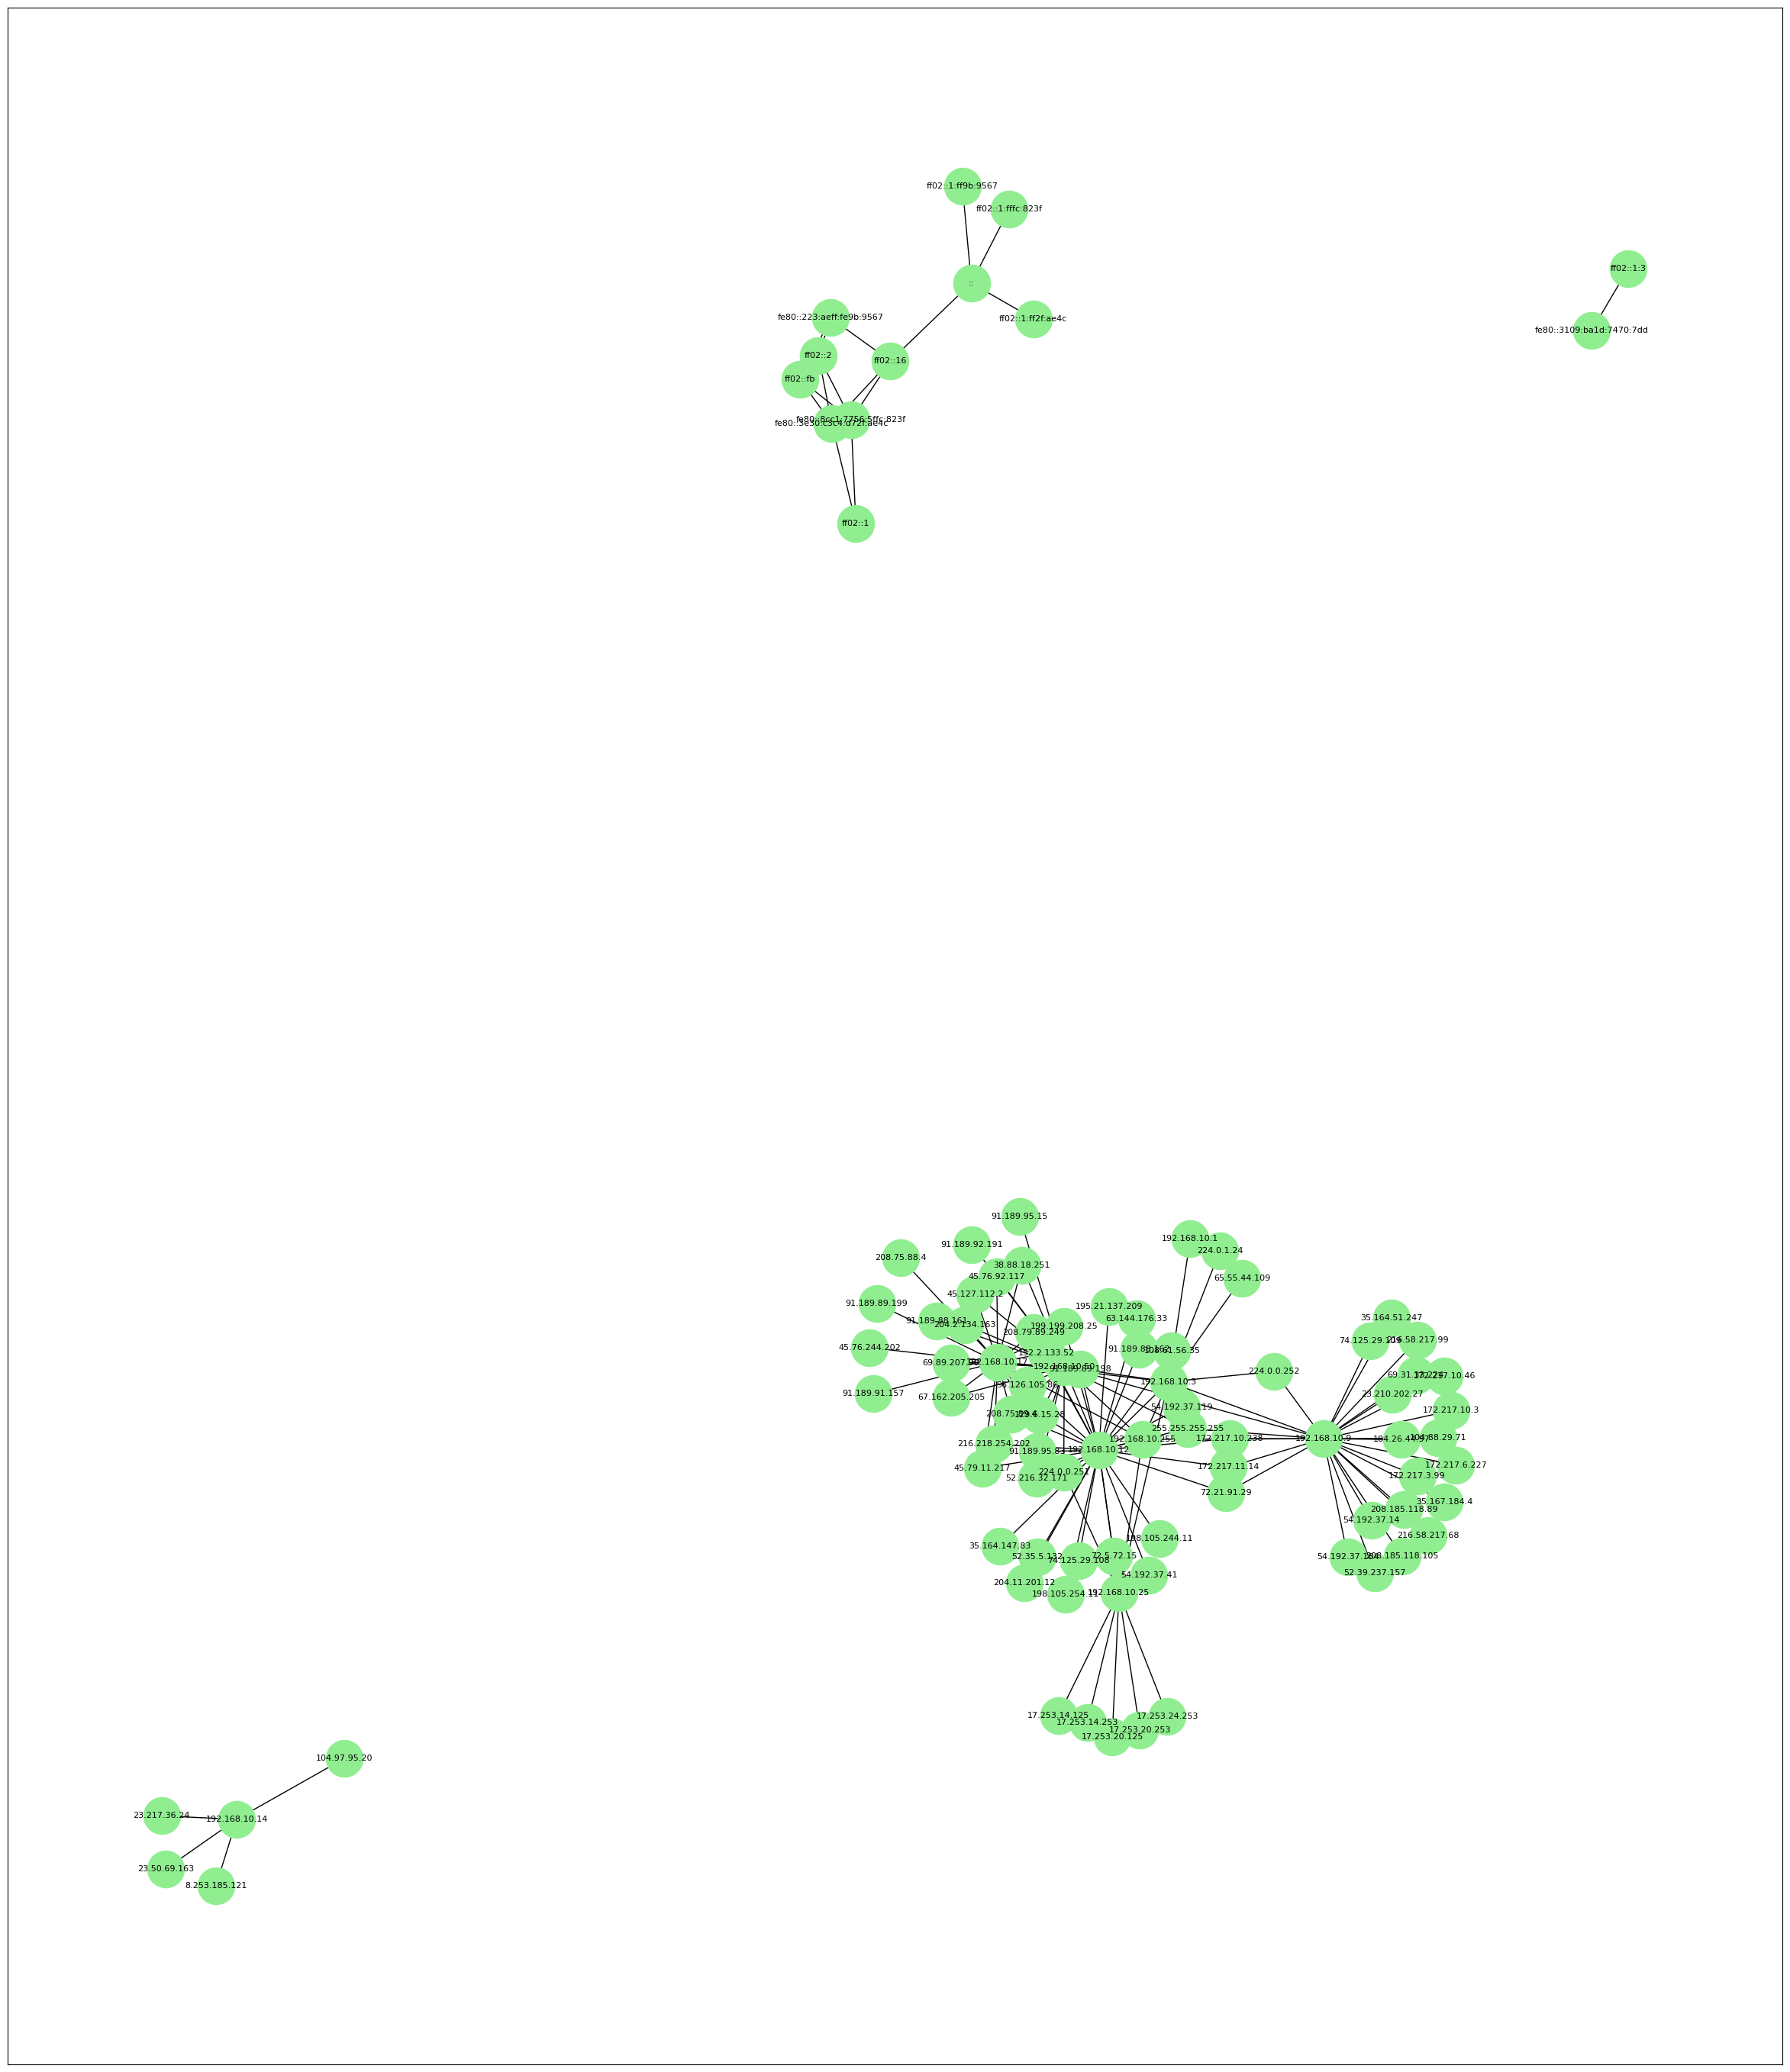

In [ ]:
#constructing an undirected graph first
G_u = nx.Graph()
G_u = nx.from_pandas_edgelist(x_1, source='id.orig_h', target='id.resp_h')
plt.figure(figsize=(30, 35))
nx.draw_networkx(G_u,node_color='lightgreen', node_size = 1200, font_size = 8)
plt.show()

In [17]:
#Creating a directed graph using edge weights (weighing edges by the number of connections between two nodes)
#Used pandas group by to find the count of total number of edges
x_1_edges = x_1.groupby(['id.orig_h', 'id.resp_h']).size().reset_index(name='counts')

In [18]:
x_1_edges

id.orig_h          id.resp_h  counts
0                 192.168.10.1       192.168.10.3       1
1                192.168.10.12       108.61.56.35       4
2                192.168.10.12        129.6.15.28       4
3                192.168.10.12       152.2.133.52       4
4                192.168.10.12     172.217.10.238       1
5                192.168.10.12      172.217.11.14       2
6                192.168.10.12     192.168.10.255       9
7                192.168.10.12       192.168.10.3     406
8                192.168.10.12      192.168.10.50       2
9                192.168.10.12     195.21.137.209       1
10               192.168.10.12     198.105.244.11       2
11               192.168.10.12     198.105.254.11       2
12               192.168.10.12     199.199.208.25       4
13               192.168.10.12      204.11.201.12       4
14               192.168.10.12        208.75.89.4       4
15               192.168.10.12      208.79.89.249       4
16               192.168.10.12    216.218.254.202       4
17               192.168.10.12        224.0.0.251       9
18               192.168.10.12    255.255.255.255       4
19               192.168.10.12      35.164.147.83       1
20               192.168.10.12       45.79.11.217       4
21               192.168.10.12      52.216.32.171       1
22               192.168.10.12        52.35.5.132       1
23               192.168.10.12      54.192.37.119       2
24               192.168.10.12       54.192.37.41       1
25               192.168.10.12      63.144.176.33       1
26               192.168.10.12        72.21.91.29       2
27               192.168.10.12         72.5.72.15       4
28               192.168.10.12      74.125.29.108       1
29               192.168.10.12      91.189.88.162       2
30               192.168.10.12      91.189.89.198       5
31               192.168.10.12       91.189.95.83       1
32               192.168.10.12      96.126.105.86       4
33               192.168.10.14       104.97.95.20       2
34               192.168.10.14       23.217.36.24       2
35               192.168.10.14       23.50.69.163       1
36               192.168.10.14      8.253.185.121       1
37               192.168.10.17        129.6.15.28       3
38               192.168.10.17       152.2.133.52       3
39               192.168.10.17     192.168.10.255       3
40               192.168.10.17       192.168.10.3      96
41               192.168.10.17     199.199.208.25       3
42               192.168.10.17      204.2.134.163       3
43               192.168.10.17        208.75.88.4       3
44               192.168.10.17        208.75.89.4       3
45               192.168.10.17      208.79.89.249       3
46               192.168.10.17    216.218.254.202       3
47               192.168.10.17        224.0.0.251       6
48               192.168.10.17       38.88.18.251       4
49               192.168.10.17       45.127.112.2       4
50               192.168.10.17      45.76.244.202       3
51               192.168.10.17       45.76.92.117       4
52               192.168.10.17       45.79.11.217       3
53               192.168.10.17     67.162.205.205       3
54               192.168.10.17       69.89.207.99       3
55               192.168.10.17      91.189.89.198       4
56               192.168.10.17      91.189.89.199       5
57               192.168.10.17      91.189.91.157       4
58               192.168.10.17      96.126.105.86       3
59               192.168.10.25      17.253.14.125       1
60               192.168.10.25      17.253.14.253       1
61               192.168.10.25      17.253.20.125       1
62               192.168.10.25      17.253.20.253       4
63               192.168.10.25      17.253.24.253       1
64               192.168.10.25      192.168.10.12       2
65               192.168.10.25     192.168.10.255       5
66               192.168.10.25       192.168.10.3      58
67               192.168.10.25        224.0.0.251       7
68                1

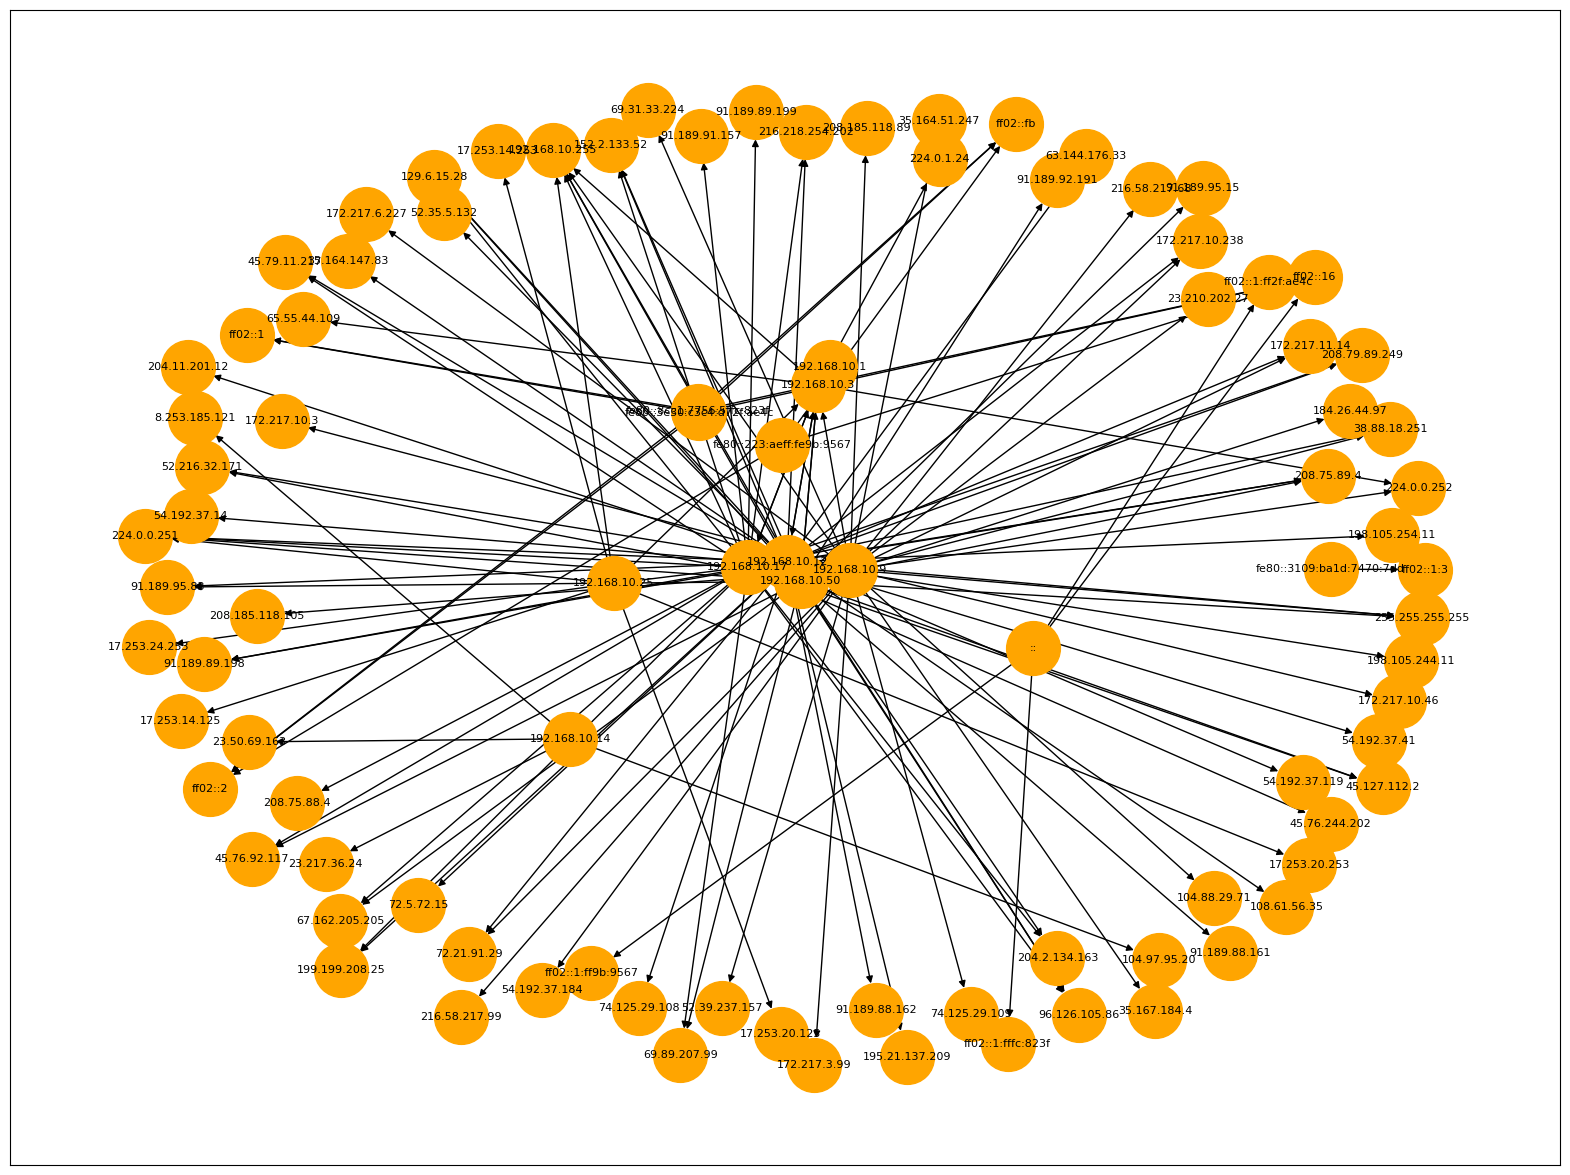

In [43]:
#Creating another graph with edge weights calculated above
G_w = nx.Graph()
G_w = nx.from_pandas_edgelist(x_1_edges, source='id.orig_h', target='id.resp_h',edge_attr='counts', create_using = nx.DiGraph)
plt.figure(figsize=(20, 15))
nx.draw_networkx(G_w,node_color='orange', node_size = 1500, font_size = 8)
plt.show()

In [44]:
#Checking the total number of nodes or unique IP's in the graph.
len(G_w.nodes)

94

In [45]:
#Generating node feature vectors through centrality metrics
#The utilized graph centrality metrics include: in-degree, out-degree, Katz, betweenness centrality, and closeness centrality
#A total of 94 nodes exist in the graph, requiring feature computation"
#The new table will be of [94 x 5] size
#Calculate centrality metrics
in_degree = dict(G_w.in_degree())
out_degree = dict(G_w.out_degree())
katz_centrality = nx.katz_centrality(G_w)
betweenness_centrality = nx.betweenness_centrality(G_w)
closeness_centrality = nx.closeness_centrality(G_w)

# Create a feature vector for each node
feature_vectors = []
for node in G_w.nodes():
    feature_vector = [
        in_degree[node],
        out_degree[node],
        katz_centrality[node],
        betweenness_centrality[node],
        closeness_centrality[node]
    ]
    feature_vectors.append(feature_vector)

# Display the feature vectors
for node, feature_vector in zip(G_w.nodes(), feature_vectors):
    print("Node", node, ":", feature_vector)


Node 192.168.10.1 : [1, 1, 0.10173533420778473, 0.0, 0.03519061583577712]
Node 192.168.10.3 : [6, 8, 0.14907750898310201, 0.014999220819697677, 0.06451612903225806]
Node 192.168.10.12 : [3, 32, 0.12268676329300686, 0.015213495402836216, 0.04301075268817204]
Node 108.61.56.35 : [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172]
Node 129.6.15.28 : [3, 0, 0.12153846102388423, 0.0, 0.0439068100358423]
Node 152.2.133.52 : [3, 0, 0.12153846102388423, 0.0, 0.0439068100358423]
Node 172.217.10.238 : [2, 0, 0.10777902057559235, 0.0, 0.03763440860215054]
Node 172.217.11.14 : [2, 0, 0.10777902057559235, 0.0, 0.03763440860215054]
Node 192.168.10.255 : [6, 0, 0.1538117220393728, 0.0, 0.06586021505376344]
Node 192.168.10.50 : [3, 20, 0.12268676329300686, 0.007421692379616643, 0.04301075268817204]
Node 195.21.137.209 : [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172]
Node 198.105.244.11 : [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172]
Node 198.105.254.11 : [1, 0, 0.09909626142655532, 0.

In [46]:
feature_vectors

[[1, 1, 0.10173533420778473, 0.0, 0.03519061583577712],
 [6, 8, 0.14907750898310201, 0.014999220819697677, 0.06451612903225806],
 [3, 32, 0.12268676329300686, 0.015213495402836216, 0.04301075268817204],
 [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172],
 [3, 0, 0.12153846102388423, 0.0, 0.0439068100358423],
 [3, 0, 0.12153846102388423, 0.0, 0.0439068100358423],
 [2, 0, 0.10777902057559235, 0.0, 0.03763440860215054],
 [2, 0, 0.10777902057559235, 0.0, 0.03763440860215054],
 [6, 0, 0.1538117220393728, 0.0, 0.06586021505376344],
 [3, 20, 0.12268676329300686, 0.007421692379616643, 0.04301075268817204],
 [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172],
 [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172],
 [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172],
 [2, 0, 0.10926979108769908, 0.0, 0.03763440860215054],
 [1, 0, 0.09909626142655532, 0.0, 0.03293010752688172],
 [3, 0, 0.12153846102388423, 0.0, 0.0439068100358423],
 [2, 0, 0.10926979108769908, 0.0, 0.03763440860215054],

In [47]:
#Creating a new dataframe with all the graph centrality metrics
new_x = pd.DataFrame(feature_vectors, columns = ['in_degree', 'out_degree', 'katz_centrality',
'betweenness_centrality', 'closeness_centrality'] )

In [48]:
new_x

in_degree  out_degree  katz_centrality  betweenness_centrality  \
0           1           1         0.101735                0.000000   
1           6           8         0.149078                0.014999   
2           3          32         0.122687                0.015213   
3           1           0         0.099096                0.000000   
4           3           0         0.121538                0.000000   
5           3           0         0.121538                0.000000   
6           2           0         0.107779                0.000000   
7           2           0         0.107779                0.000000   
8           6           0         0.153812                0.000000   
9           3          20         0.122687                0.007422   
10          1           0         0.099096                0.000000   
11          1           0         0.099096                0.000000   
12          1           0         0.099096                0.000000   
13          2           0         0.109270                0.000000   
14          1           0         0.099096                0.000000   
15          3           0         0.121538                0.000000   
16          2           0         0.109270                0.000000   
17          2           0         0.109270                0.000000   
18          4           0         0.130221                0.000000   
19          3           0         0.120048                0.000000   
20          1           0         0.099096                0.000000   
21          2           0         0.109270                0.000000   
22          2           0         0.111365                0.000000   
23          1           0         0.099096                0.000000   
24          1           0         0.099096                0.000000   
25          1           0         0.099096                0.000000   
26          1           0         0.099096                0.000000   
27          2           0         0.107779                0.000000   
28          1           0         0.099096                0.000000   
29          1           0         0.099096                0.000000   
30          1           0         0.099096                0.000000   
31          2           0         0.109270                0.000000   
32          2           0         0.111365                0.000000   
33          3           0         0.121538                0.000000   
34          0           4         0.086828                0.000000   
35          1           0         0.095510                0.000000   
36          1           0         0.095510                0.000000   
37          1           0         0.095510                0.000000   
38          1           0         0.095510                0.000000   
39          1          22         0.101735                0.004909   
40          2           0         0.109270                0.000000   
41          1           0         0.097001                0.000000   
42          2           0         0.109270                0.000000   
43          2           0         0.109270                0.000000   
44          1           0         0.097001                0.000000   
45          2           0         0.109270                0.000000   
46          2           0         0.109270                0.000000   
47          2           0         0.109270                0.000000   
48          1           0         0.097001                0.000000   
49          1           0         0.097001                0.000000   
50          0           9         0.086828                0.000000   
51          1           0         0.095510                0.000000   
52          1           0         0.095510                0.000000   
53          1           0         0.095510                0.000000   
54          1           0         0.095510                0.000000   
55          1           0         0.095510                0.000000   
56          2 

In [49]:
# Visualizing the distribution of features.
def plot_feature_kde(data):
    """
    Plot KDE plots for all the features in the input DataFrame.

    Parameters:
        data (pd.DataFrame): A pandas DataFrame containing the graph features.

    Returns:
        None
    """
    # Set the number of subplots based on the number of features
    num_features = data.shape[1]
    num_cols = 2
    num_rows = (num_features + 1) // num_cols

    # Create subplots to plot each feature's KDE plot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    # Flatten the axes array to handle the case when num_features is not a multiple of num_cols
    axes = axes.flatten()

    # Plot the KDE plots for each feature
    for i, (col, ax) in enumerate(zip(data.columns, axes)):
        sns.kdeplot(data[col], ax=ax, fill=True)
        ax.set_title(f'KDE Plot for {col}')
        ax.set_xlabel('Feature Value')
        ax.set_ylabel('Density')

    # Remove any unused subplots
    if num_features < len(axes):
        for j in range(num_features, len(axes)):
            axes[j].remove()

    plt.tight_layout()
    plt.show()



# Call the function to plot the KDE plots



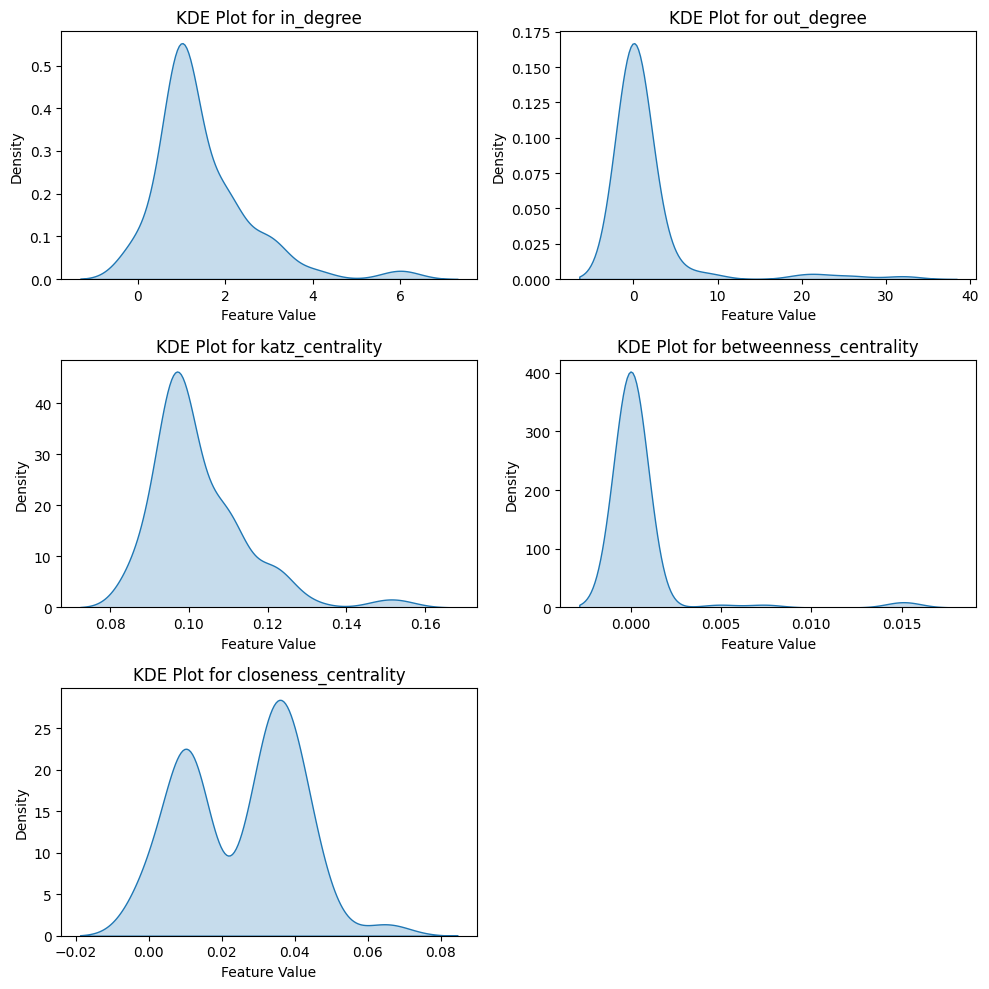

In [33]:
plot_feature_kde(new_x)

In [37]:
def plot_column_distributions(dataframe):
    fig, axes = plt.subplots(nrows=len(dataframe.columns), figsize=(12, 10))

    for i, col in enumerate(dataframe.columns):
        dataframe[col].hist(bins=10, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

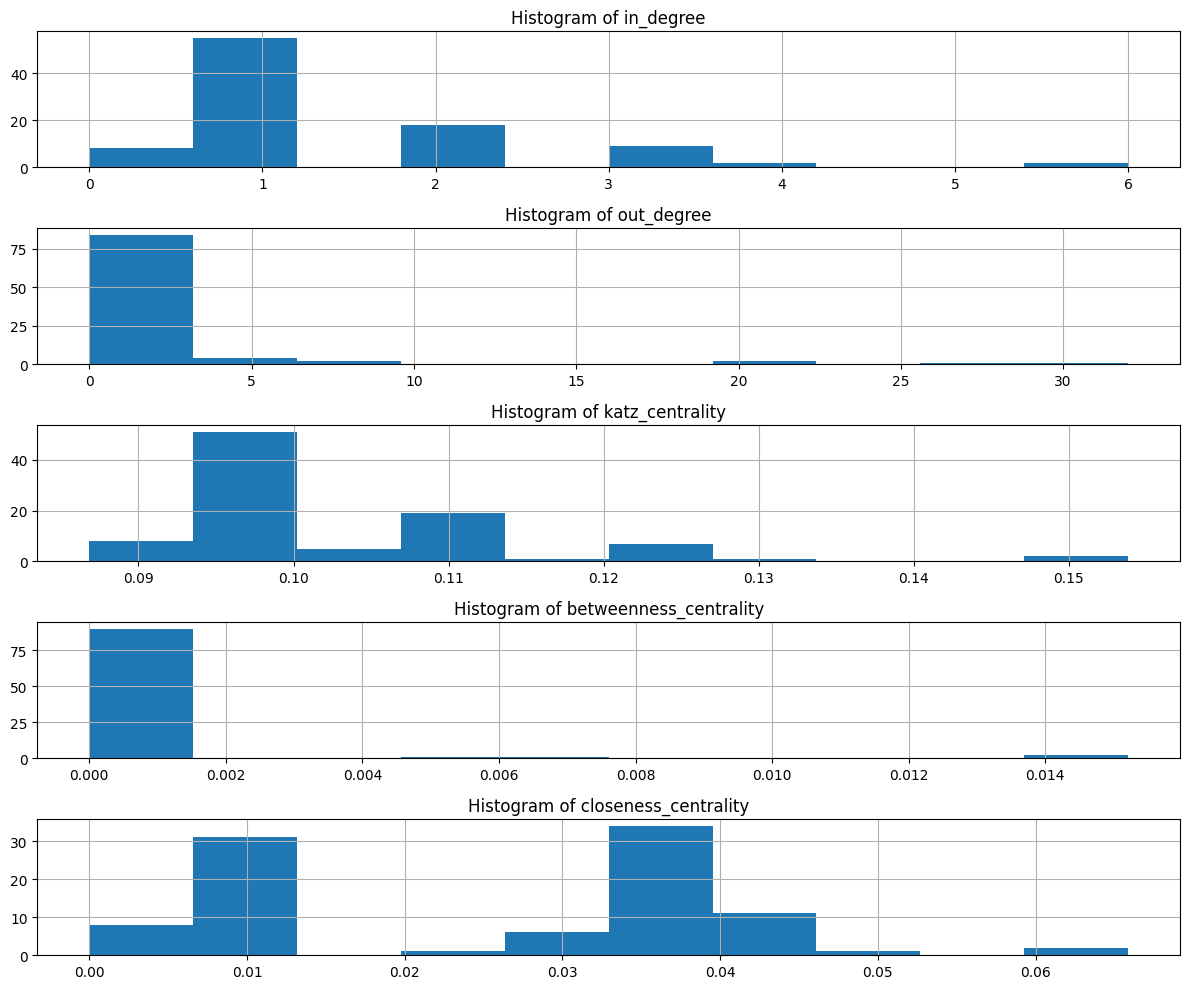

In [38]:
plot_column_distributions(new_x)

In [50]:
#standardizing the features (Normalizing the features)
from sklearn.preprocessing import StandardScaler

def standardize_features(dataframe):
    # Create a StandardScaler object
    scaler = StandardScaler()

    # Standardize the features in the dataframe
    standardized_data = scaler.fit_transform(dataframe)

    # Create a new DataFrame with standardized features
    standardized_df = pd.DataFrame(standardized_data, columns=dataframe.columns)

    # Return the standardized DataFrame
    return standardized_df


In [51]:
new_x = standardize_features(new_x)

In [52]:
new_x

in_degree  out_degree  katz_centrality  betweenness_centrality  \
0   -0.433882   -0.088978        -0.060276               -0.193105   
1    4.200767    1.241654         3.916678                6.206604   
2    1.419977    5.803821         1.699738                6.298028   
3   -0.433882   -0.279069        -0.281970               -0.193105   
4    1.419977   -0.279069         1.603275               -0.193105   
5    1.419977   -0.279069         1.603275               -0.193105   
6    0.493048   -0.279069         0.447421               -0.193105   
7    0.493048   -0.279069         0.447421               -0.193105   
8    4.200767   -0.279069         4.314373               -0.193105   
9    1.419977    3.522738         1.699738                2.973504   
10  -0.433882   -0.279069        -0.281970               -0.193105   
11  -0.433882   -0.279069        -0.281970               -0.193105   
12  -0.433882   -0.279069        -0.281970               -0.193105   
13   0.493048   -0.279069         0.572652               -0.193105   
14  -0.433882   -0.279069        -0.281970               -0.193105   
15   1.419977   -0.279069         1.603275               -0.193105   
16   0.493048   -0.279069         0.572652               -0.193105   
17   0.493048   -0.279069         0.572652               -0.193105   
18   2.346907   -0.279069         2.332666               -0.193105   
19   1.419977   -0.279069         1.478044               -0.193105   
20  -0.433882   -0.279069        -0.281970               -0.193105   
21   0.493048   -0.279069         0.572652               -0.193105   
22   0.493048   -0.279069         0.748653               -0.193105   
23  -0.433882   -0.279069        -0.281970               -0.193105   
24  -0.433882   -0.279069        -0.281970               -0.193105   
25  -0.433882   -0.279069        -0.281970               -0.193105   
26  -0.433882   -0.279069        -0.281970               -0.193105   
27   0.493048   -0.279069         0.447421               -0.193105   
28  -0.433882   -0.279069        -0.281970               -0.193105   
29  -0.433882   -0.279069        -0.281970               -0.193105   
30  -0.433882   -0.279069        -0.281970               -0.193105   
31   0.493048   -0.279069         0.572652               -0.193105   
32   0.493048   -0.279069         0.748653               -0.193105   
33   1.419977   -0.279069         1.603275               -0.193105   
34  -1.360812    0.481293        -1.312593               -0.193105   
35  -0.433882   -0.279069        -0.583202               -0.193105   
36  -0.433882   -0.279069        -0.583202               -0.193105   
37  -0.433882   -0.279069        -0.583202               -0.193105   
38  -0.433882   -0.279069        -0.583202               -0.193105   
39  -0.433882    3.902918        -0.060276                1.901345   
40   0.493048   -0.279069         0.572652               -0.193105   
41  -0.433882   -0.279069        -0.457971               -0.193105   
42   0.493048   -0.279069         0.572652               -0.193105   
43   0.493048   -0.279069         0.572652               -0.193105   
44  -0.433882   -0.279069        -0.457971               -0.193105   
45   0.493048   -0.279069         0.572652               -0.193105   
46   0.493048   -0.279069         0.572652               -0.193105   
47   0.493048   -0.279069         0.572652               -0.193105   
48  -0.433882   -0.279069        -0.457971               -0.193105   
49  -0.433882   -0.279069        -0.457971               -0.193105   
50  -1.360812    1.431744        -1.312593               -0.193105   
51  -0.433882   -0.279069        -0.583202               -0.193105   
52  -0.433882   -0.279069        -0.583202               -0.193105   
53  -0.433882   -0.279069        -0.583202               -0.193105   
54  -0.433882   -0.279069        -0.583202               -0.193105   
55  -0.433882   -0.279069        -0.583202               -0.193105   
56   0.493048 

In [61]:
#Adding the nodes on the graph to the data frame of normalized feature vectors
nodes = G_w.nodes
nodes = list(nodes)
new_x['Nodes'] = nodes
new_x

in_degree  out_degree  katz_centrality  betweenness_centrality  \
0   -0.433882   -0.088978        -0.060276               -0.193105   
1    4.200767    1.241654         3.916678                6.206604   
2    1.419977    5.803821         1.699738                6.298028   
3   -0.433882   -0.279069        -0.281970               -0.193105   
4    1.419977   -0.279069         1.603275               -0.193105   
5    1.419977   -0.279069         1.603275               -0.193105   
6    0.493048   -0.279069         0.447421               -0.193105   
7    0.493048   -0.279069         0.447421               -0.193105   
8    4.200767   -0.279069         4.314373               -0.193105   
9    1.419977    3.522738         1.699738                2.973504   
10  -0.433882   -0.279069        -0.281970               -0.193105   
11  -0.433882   -0.279069        -0.281970               -0.193105   
12  -0.433882   -0.279069        -0.281970               -0.193105   
13   0.493048   -0.279069         0.572652               -0.193105   
14  -0.433882   -0.279069        -0.281970               -0.193105   
15   1.419977   -0.279069         1.603275               -0.193105   
16   0.493048   -0.279069         0.572652               -0.193105   
17   0.493048   -0.279069         0.572652               -0.193105   
18   2.346907   -0.279069         2.332666               -0.193105   
19   1.419977   -0.279069         1.478044               -0.193105   
20  -0.433882   -0.279069        -0.281970               -0.193105   
21   0.493048   -0.279069         0.572652               -0.193105   
22   0.493048   -0.279069         0.748653               -0.193105   
23  -0.433882   -0.279069        -0.281970               -0.193105   
24  -0.433882   -0.279069        -0.281970               -0.193105   
25  -0.433882   -0.279069        -0.281970               -0.193105   
26  -0.433882   -0.279069        -0.281970               -0.193105   
27   0.493048   -0.279069         0.447421               -0.193105   
28  -0.433882   -0.279069        -0.281970               -0.193105   
29  -0.433882   -0.279069        -0.281970               -0.193105   
30  -0.433882   -0.279069        -0.281970               -0.193105   
31   0.493048   -0.279069         0.572652               -0.193105   
32   0.493048   -0.279069         0.748653               -0.193105   
33   1.419977   -0.279069         1.603275               -0.193105   
34  -1.360812    0.481293        -1.312593               -0.193105   
35  -0.433882   -0.279069        -0.583202               -0.193105   
36  -0.433882   -0.279069        -0.583202               -0.193105   
37  -0.433882   -0.279069        -0.583202               -0.193105   
38  -0.433882   -0.279069        -0.583202               -0.193105   
39  -0.433882    3.902918        -0.060276                1.901345   
40   0.493048   -0.279069         0.572652               -0.193105   
41  -0.433882   -0.279069        -0.457971               -0.193105   
42   0.493048   -0.279069         0.572652               -0.193105   
43   0.493048   -0.279069         0.572652               -0.193105   
44  -0.433882   -0.279069        -0.457971               -0.193105   
45   0.493048   -0.279069         0.572652               -0.193105   
46   0.493048   -0.279069         0.572652               -0.193105   
47   0.493048   -0.279069         0.572652               -0.193105   
48  -0.433882   -0.279069        -0.457971               -0.193105   
49  -0.433882   -0.279069        -0.457971               -0.193105   
50  -1.360812    1.431744        -1.312593               -0.193105   
51  -0.433882   -0.279069        -0.583202               -0.193105   
52  -0.433882   -0.279069        -0.583202               -0.193105   
53  -0.433882   -0.279069        -0.583202               -0.193105   
54  -0.433882   -0.279069        -0.583202               -0.193105   
55  -0.433882   -0.279069        -0.583202               -0.193105   
56   0.493048 

In [62]:
# Restructuring the dataframe for ease of use
columns = new_x.columns.tolist()
last_column = columns[-1]

# Move the last node's column to the first place
columns = [last_column] + columns[:-1]

# Reorder the dataframe columns
new_x = new_x[columns]

# Display the updated DataFrame
print(new_x)

                        Nodes  in_degree  out_degree  katz_centrality  \
0                192.168.10.1  -0.433882   -0.088978        -0.060276   
1                192.168.10.3   4.200767    1.241654         3.916678   
2               192.168.10.12   1.419977    5.803821         1.699738   
3                108.61.56.35  -0.433882   -0.279069        -0.281970   
4                 129.6.15.28   1.419977   -0.279069         1.603275   
5                152.2.133.52   1.419977   -0.279069         1.603275   
6              172.217.10.238   0.493048   -0.279069         0.447421   
7               172.217.11.14   0.493048   -0.279069         0.447421   
8              192.168.10.255   4.200767   -0.279069         4.314373   
9               192.168.10.50   1.419977    3.522738         1.699738   
10             195.21.137.209  -0.433882   -0.279069        -0.281970   
11             198.105.244.11  -0.433882   -0.279069        -0.281970   
12             198.105.254.11  -0.433882   -0.27906

In [63]:
new_x

Nodes  in_degree  out_degree  katz_centrality  \
0                192.168.10.1  -0.433882   -0.088978        -0.060276   
1                192.168.10.3   4.200767    1.241654         3.916678   
2               192.168.10.12   1.419977    5.803821         1.699738   
3                108.61.56.35  -0.433882   -0.279069        -0.281970   
4                 129.6.15.28   1.419977   -0.279069         1.603275   
5                152.2.133.52   1.419977   -0.279069         1.603275   
6              172.217.10.238   0.493048   -0.279069         0.447421   
7               172.217.11.14   0.493048   -0.279069         0.447421   
8              192.168.10.255   4.200767   -0.279069         4.314373   
9               192.168.10.50   1.419977    3.522738         1.699738   
10             195.21.137.209  -0.433882   -0.279069        -0.281970   
11             198.105.244.11  -0.433882   -0.279069        -0.281970   
12             198.105.254.11  -0.433882   -0.279069        -0.281970   
13             199.199.208.25   0.493048   -0.279069         0.572652   
14              204.11.201.12  -0.433882   -0.279069        -0.281970   
15                208.75.89.4   1.419977   -0.279069         1.603275   
16              208.79.89.249   0.493048   -0.279069         0.572652   
17            216.218.254.202   0.493048   -0.279069         0.572652   
18                224.0.0.251   2.346907   -0.279069         2.332666   
19            255.255.255.255   1.419977   -0.279069         1.478044   
20              35.164.147.83  -0.433882   -0.279069        -0.281970   
21               45.79.11.217   0.493048   -0.279069         0.572652   
22              52.216.32.171   0.493048   -0.279069         0.748653   
23                52.35.5.132  -0.433882   -0.279069        -0.281970   
24              54.192.37.119  -0.433882   -0.279069        -0.281970   
25               54.192.37.41  -0.433882   -0.279069        -0.281970   
26              63.144.176.33  -0.433882   -0.279069        -0.281970   
27                72.21.91.29   0.493048   -0.279069         0.447421   
28                 72.5.72.15  -0.433882   -0.279069        -0.281970   
29              74.125.29.108  -0.433882   -0.279069        -0.281970   
30              91.189.88.162  -0.433882   -0.279069        -0.281970   
31              91.189.89.198   0.493048   -0.279069         0.572652   
32               91.189.95.83   0.493048   -0.279069         0.748653   
33              96.126.105.86   1.419977   -0.279069         1.603275   
34              192.168.10.14  -1.360812    0.481293        -1.312593   
35               104.97.95.20  -0.433882   -0.279069        -0.583202   
36               23.217.36.24  -0.433882   -0.279069        -0.583202   
37               23.50.69.163  -0.433882   -0.279069        -0.583202   
38              8.253.185.121  -0.433882   -0.279069        -0.583202   
39              192.168.10.17  -0.433882    3.902918        -0.060276   
40              204.2.134.163   0.493048   -0.279069         0.572652   
41                208.75.88.4  -0.433882   -0.279069        -0.457971   
42               38.88.18.251   0.493048   -0.279069         0.572652   
43               45.127.112.2   0.493048   -0.279069         0.572652   
44              45.76.244.202  -0.433882   -0.279069        -0.457971   
45               45.76.92.117   0.493048   -0.279069         0.572652   
46             67.162.205.205   0.493048   -0.279069         0.572652   
47               69.89.207.99   0.493048   -0.279069         0.572652   
48              91.189.89.199  -0.433882   -0.279069        -0.457971   
49              91.189.91.157  -0.433882   -0.279069        -0.457971   
50              192.168.10.25  -1.360812    1.431744        -1.312593   
51              17.253.14.125  -0.433882   -0.279069        -0.583202   
52              17.253.14.253  -0.433882   -0.279069        -0.583202   
53              17.253.20.125  -0.433882   -0.279069        -0.583202   
54       

In [64]:
#Giving labels to the nodes
new_x_ip = pd.DataFrame()
new_x_ip['Nodes'] = new_x['Nodes']
new_x_ip['Nodes']
new_x['Nodes'] = pd.factorize(new_x['Nodes'])[0]

In [65]:
new_x_ip

Nodes
0                192.168.10.1
1                192.168.10.3
2               192.168.10.12
3                108.61.56.35
4                 129.6.15.28
5                152.2.133.52
6              172.217.10.238
7               172.217.11.14
8              192.168.10.255
9               192.168.10.50
10             195.21.137.209
11             198.105.244.11
12             198.105.254.11
13             199.199.208.25
14              204.11.201.12
15                208.75.89.4
16              208.79.89.249
17            216.218.254.202
18                224.0.0.251
19            255.255.255.255
20              35.164.147.83
21               45.79.11.217
22              52.216.32.171
23                52.35.5.132
24              54.192.37.119
25               54.192.37.41
26              63.144.176.33
27                72.21.91.29
28                 72.5.72.15
29              74.125.29.108
30              91.189.88.162
31              91.189.89.198
32               91.189.95.83
33              96.126.105.86
34              192.168.10.14
35               104.97.95.20
36               23.217.36.24
37               23.50.69.163
38              8.253.185.121
39              192.168.10.17
40              204.2.134.163
41                208.75.88.4
42               38.88.18.251
43               45.127.112.2
44              45.76.244.202
45               45.76.92.117
46             67.162.205.205
47               69.89.207.99
48              91.189.89.199
49              91.189.91.157
50              192.168.10.25
51              17.253.14.125
52              17.253.14.253
53              17.253.20.125
54              17.253.20.253
55              17.253.24.253
56                224.0.0.252
57                 224.0.1.24
58               65.55.44.109
59              91.189.88.161
60              91.189.92.191
61               91.189.95.15
62               192.168.10.9
63               104.88.29.71
64               172.217.10.3
65              172.217.10.46
66               172.217.3.99
67              172.217.6.227
68               184.26.44.97
69            208.185.118.105
70             208.185.118.89
71              216.58.217.68
72              216.58.217.99
73              23.210.202.27
74              35.164.51.247
75               35.167.184.4
76              52.39.237.157
77               54.192.37.14
78              54.192.37.184
79               69.31.33.224
80              74.125.29.109
81                         ::
82                   ff02::16
83          ff02::1:ff2f:ae4c
84          ff02::1:ff9b:9567
85          ff02::1:fffc:823f
86   fe80::223:aeff:fe9b:9567
87                    ff02::2
88                   ff02::fb
89   fe80::3109:ba1d:7470:7dd
90                  ff02::1:3
91  fe80::3e30:c3c4:d72f:ae4c
92                    ff02::1
93  fe80::8cc1:7756:5ffc:823f

In [66]:
#Replacing the original names with the encoded names in the adjacency matrix
dictionary = dict(zip(new_x_ip['Nodes'], new_x['Nodes']))
dictionary
x_mapped = x_1.replace(dictionary)

In [67]:
x_mapped

id.orig_h  id.resp_h
0            34         38
1            62          1
2            62          1
3            62          1
4            62          1
5            62          1
6            62          1
7            62         56
8            62          1
9            62          1
10           62          1
11           62          1
12           62          1
13            1          0
14           89         90
15            1         56
16           89         90
17           89         90
18            1         56
19            1         56
20           89         90
21            1         56
22           89         90
23            1         56
24           89         90
25            1         56
26           62          1
27           62          1
28           62          1
29           62          1
30           62          1
31           62          1
32           62          1
33           62          1
34            1          0
35           62          1
36           62          1
37           62          1
38           62          1
39           62          1
40           62          1
41           62          1
42           62          1
43           62          1
44           62         79
45           62         56
46           89         90
47            1         56
48           62          1
49            1          0
50           62          1
51            1          0
52           62          1
53           62          1
54           62          1
55           62          1
56           62          1
57           62          1
58            1          0
59           62          1
60            1          0
61           62          1
62           62          1
63           62          1
64           62          1
65           62          1
66           62          1
67           62          1
68           62          1
69           62          1
70           62          8
71           62          1
72            2          1
73            2          1
74            1          0
75            2          1
76            1          0
77            2          1
78            2          1
79            2          1
80            2          1
81            2          1
82            2          1
83            2          1
84           89         90
85           89         90
86            1         56
87            1         56
88            2          1
89            2          1
90           62          1
91            1          0
92            2          1
93            2          1
94           62          1
95           89         90
96           89         90
97            1         56
98            1         56
99            2          1
100           2          1
101           2          1
102           2          1
103           2          1
104           2          1
105           2          1
106           2          1
107           2          1
108           2          1
109           2          1
110           2          1
111           2          1
112           2          1
113           2          1
114           2          1
115           2          1
116           2          1
117           2          1
118           2          1
119           2          1
120           2          1
121           2          1
122           2          1
123           2          1
124           2          1
125           2          1
126           2          1
127           2          1
128           2          1
129           2          1
130           2          1
131           2          1
132           2          1
133           2          1
134           2          1
135           2          1
136           2          1
137           2          1
138           2          1
139           2          1
140           2          1
141           2          1
142           2          1
143           2          1
144           1          0
145          62          1
146          62          1
147       

In [71]:
#Converting node_features to csv
node_feat = new_x.iloc[:, 1:]
node_feat.to_csv('node_feat.csv', index=False)

In [72]:
#Converting edge_connections to csv
edge_connections = x_mapped
edge_connections.to_csv('connections.csv', index=False)

In [446]:
# Using AnomalyDAE for detecting the top 5 anomalous nodes in the graph
input_x = torch.tensor(new_x.iloc[:, 1:].values, dtype=torch.float)
edge_index = torch.tensor(x_mapped.iloc[:, :].values, dtype=torch.long)
data = Data(x=input_x, edge_index=edge_index.t().contiguous())


from pygod.detector import AnomalyDAE
model_1 = AnomalyDAE(epoch= 100, alpha = 0.01, num_layers=4, lr = 0.009, verbose = 3, save_emb = True, eta= 100, hid_dim = 64)  # hyperparameters can be set here
model_1.fit(data)  # input data is a PyG data object

# get outlier scores on the training data (transductive setting)
score = model_1.decision_score_

# predict labels and scores on the testing data (inductive setting)
#pred, score = model.predict(test_data, return_score=True)

Epoch 0000: Loss 1.7415 |  | Time 0.02
Epoch 0001: Loss 20.9884 |  | Time 0.01
Epoch 0002: Loss 6.0518 |  | Time 0.01
Epoch 0003: Loss 1.0753 |  | Time 0.01
Epoch 0004: Loss 1.9967 |  | Time 0.01
Epoch 0005: Loss 1.8904 |  | Time 0.01
Epoch 0006: Loss 1.5792 |  | Time 0.01
Epoch 0007: Loss 1.3271 |  | Time 0.01
Epoch 0008: Loss 1.1588 |  | Time 0.01
Epoch 0009: Loss 1.0088 |  | Time 0.02
Epoch 0010: Loss 0.8824 |  | Time 0.01
Epoch 0011: Loss 0.8333 |  | Time 0.01
Epoch 0012: Loss 0.8382 |  | Time 0.01
Epoch 0013: Loss 0.8387 |  | Time 0.01
Epoch 0014: Loss 0.8566 |  | Time 0.01
Epoch 0015: Loss 0.8680 |  | Time 0.01
Epoch 0016: Loss 0.8424 |  | Time 0.01
Epoch 0017: Loss 0.7897 |  | Time 0.01
Epoch 0018: Loss 0.7418 |  | Time 0.02
Epoch 0019: Loss 0.7316 |  | Time 0.01
Epoch 0020: Loss 0.7557 |  | Time 0.02
Epoch 0021: Loss 0.7764 |  | Time 0.02
Epoch 0022: Loss 0.7744 |  | Time 0.01
Epoch 0023: Loss 0.7521 |  | Time 0.01
Epoch 0024: Loss 0.7234 |  | Time 0.01
Epoch 0025: Loss 0.7099 

In [447]:
flattened_tensor = score.flatten()
# Retrieve the indices and values of the top 5 elements
top_indices = torch.topk(flattened_tensor, k=5).indices
top_values = flattened_tensor[top_indices]

# Print the top values
print(top_values)
print(top_indices)

tensor([9.8671, 7.2391, 2.5614, 1.9133, 1.8521])
tensor([ 2,  1, 62,  9, 39])


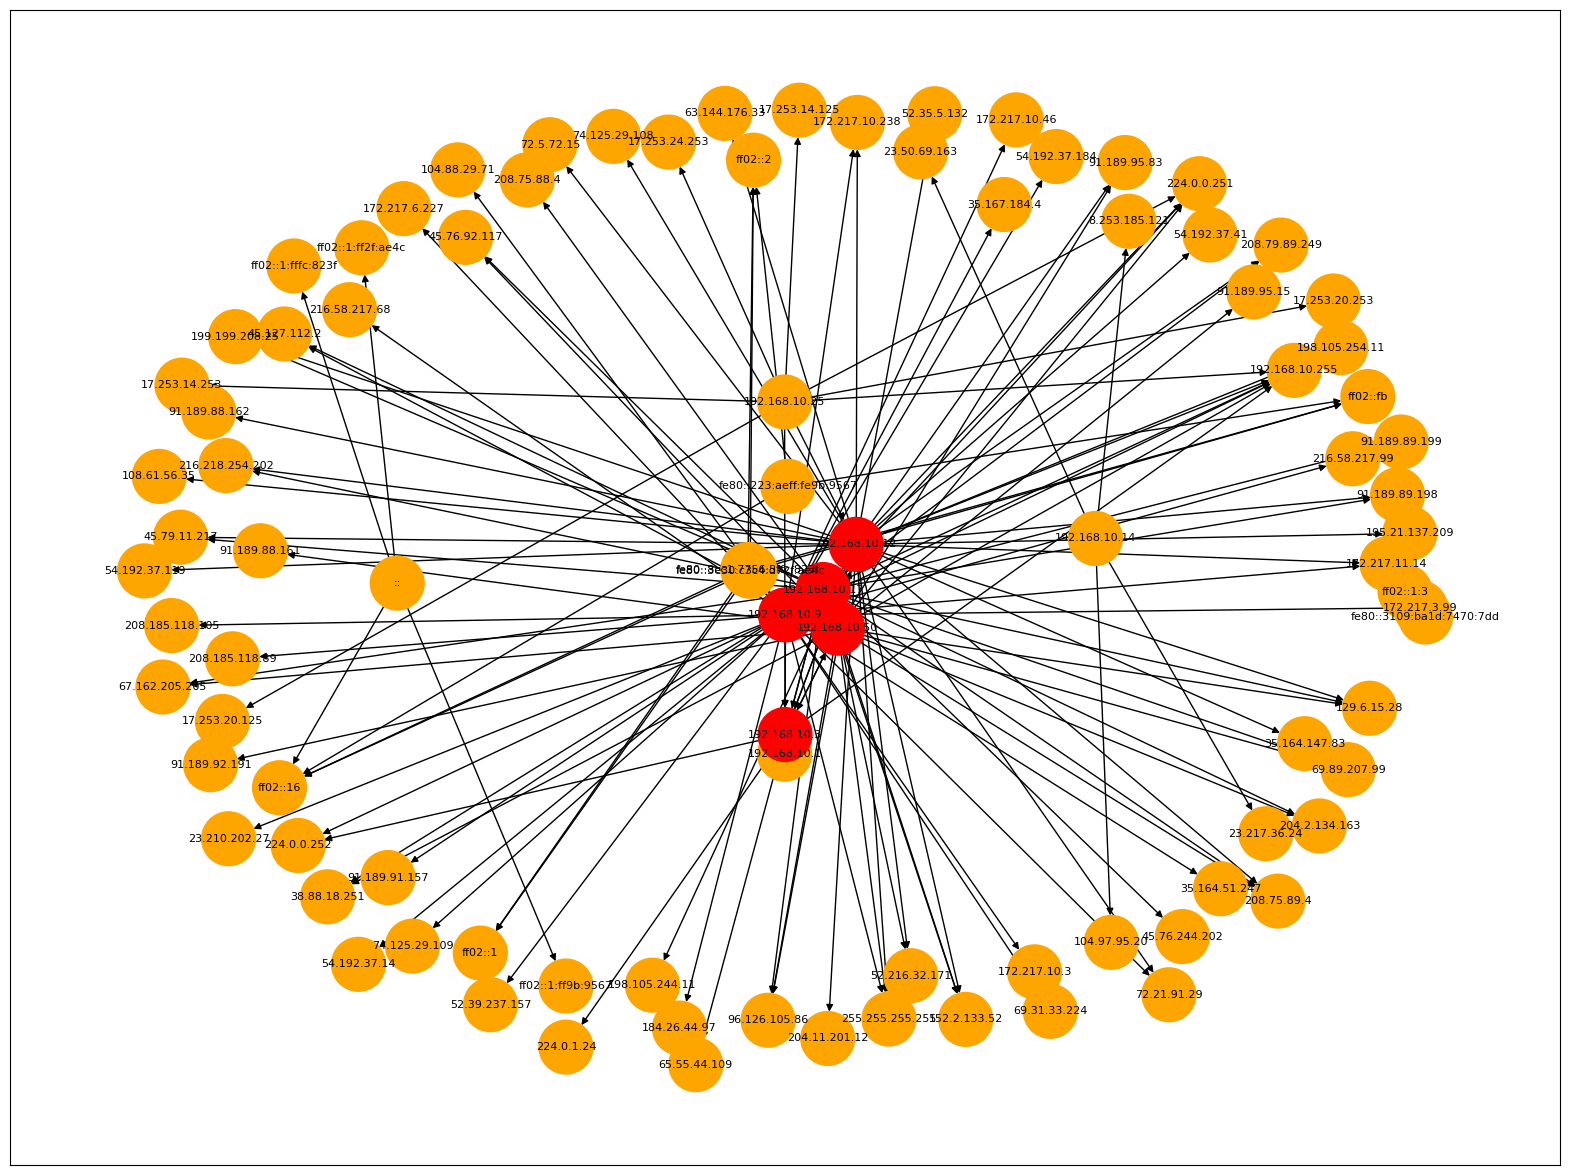

In [417]:
#Coloring the top 5 anomalous nodes of the graph
# Convert the top indices from PyTorch tensor to a list
top_values_list = top_values.tolist()

# Create a list to store the node colors
node_colors = []

# Iterate over the nodes in the graph
for node in G_w.nodes:
    if node in top_anomalous:
        # Color the node corresponding to a top index as 'red'
        node_colors.append('red')
    else:
        # Color the remaining nodes as 'blue'
        node_colors.append('orange')

# Draw the graph with colored nodes
# Adjust the layout if needed
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G_w)
nx.draw_networkx(G_w, pos =pos, node_color=node_colors, node_size = 1500, font_size = 8)

# Display the graph
plt.show()

In [448]:
#taking out embeddings from the latent space of the algorithm
model_emb = model_1.emb
model_emb

tensor([[-0.1804,  0.3044, -0.7802,  ...,  0.4313,  0.2302,  0.2621],
        [-1.0054,  1.6841,  0.7781,  ..., -0.3202, -1.5538, -0.9912],
        [-0.7009,  1.1510,  0.5215,  ..., -0.1918, -0.8391, -0.6080],
        ...,
        [-0.2528,  0.5522,  0.4525,  ..., -0.2502, -0.1147, -0.3708],
        [-0.0254,  0.1075, -0.5852,  ...,  0.1765,  0.7284,  0.1447],
        [-0.2528,  0.5522,  0.4525,  ..., -0.2502, -0.1147, -0.3708]],
       grad_fn=<IndexPutBackward0>)

In [449]:
#Creating a dataframe consisting of all the data from the latent or embedding space
embed = model_emb.detach().numpy()
df = pd.DataFrame(embed)

In [450]:
df

0         1         2         3         4         5         6   \
0  -0.180410  0.304350 -0.780192 -0.495719 -0.404720  0.985325 -0.320261   
1  -1.005412  1.684131  0.778134  0.331472  0.578260 -0.853194  2.093299   
2  -0.700862  1.151041  0.521533  0.108199  0.562755 -0.538971  1.352219   
3  -0.100852  0.226388 -0.781471 -0.544151 -0.430630  0.962469 -0.355779   
4  -0.833505  0.376778 -1.705944 -0.829041 -0.468993  1.740909 -1.466897   
5  -0.833505  0.376778 -1.705944 -0.829041 -0.468993  1.740909 -1.466897   
6  -0.305704  0.130790 -1.156380 -0.580843 -0.380785  1.151264 -0.813456   
7  -0.305902  0.131083 -1.156046 -0.580771 -0.380629  1.150931 -0.812917   
8  -2.554943  1.526434 -2.852070 -1.414039 -1.067210  3.364229 -3.255788   
9  -1.510017  1.999003  0.906563  0.071453  0.678269 -0.957558  2.516877   
10 -0.100764  0.226090 -0.781701 -0.544397 -0.430837  0.962771 -0.356214   
11 -0.100794  0.226189 -0.781624 -0.544315 -0.430768  0.962671 -0.356069   
12 -0.100794  0.226189 -0.781624 -0.544315 -0.430768  0.962671 -0.356069   
13 -0.329293  0.136787 -1.209456 -0.604050 -0.393226  1.179120 -0.847111   
14 -0.100852  0.226388 -0.781471 -0.544151 -0.430630  0.962469 -0.355779   
15 -0.833505  0.376778 -1.705944 -0.829041 -0.468993  1.740909 -1.466897   
16 -0.329293  0.136787 -1.209456 -0.604050 -0.393226  1.179120 -0.847111   
17 -0.329293  0.136787 -1.209456 -0.604050 -0.393226  1.179120 -0.847111   
18 -1.342466  0.750137 -1.924258 -0.962968 -0.636476  2.198895 -2.003188   
19 -0.760003  0.368967 -1.569903 -0.768556 -0.433681  1.625350 -1.408045   
20 -0.100764  0.226090 -0.781701 -0.544397 -0.430837  0.962771 -0.356214   
21 -0.329293  0.136787 -1.209456 -0.604050 -0.393226  1.179120 -0.847111   
22 -0.362674  0.146812 -1.283364 -0.636555 -0.415182  1.222088 -0.896008   
23 -0.100764  0.226090 -0.781701 -0.544397 -0.430837  0.962771 -0.356214   
24 -0.100794  0.226189 -0.781624 -0.544315 -0.430768  0.962671 -0.356069   
25 -0.100764  0.226090 -0.781701 -0.544397 -0.430837  0.962771 -0.356214   
26 -0.100764  0.226090 -0.781701 -0.544397 -0.430837  0.962771 -0.356214   
27 -0.305967  0.131177 -1.155938 -0.580750 -0.380579  1.150824 -0.812744   
28 -0.100852  0.226388 -0.781471 -0.544151 -0.430630  0.962469 -0.355779   
29 -0.100764  0.226090 -0.781701 -0.544397 -0.430837  0.962771 -0.356214   
30 -0.100794  0.226189 -0.781624 -0.544315 -0.430768  0.962671 -0.356069   
31 -0.329307  0.136864 -1.209365 -0.603988 -0.393187  1.179025 -0.846972   
32 -0.362674  0.146812 -1.283364 -0.636555 -0.415182  1.222088 -0.896008   
33 -0.833505  0.376778 -1.705944 -0.829041 -0.468993  1.740909 -1.466897   
34 -0.252771  0.552152  0.452485 -0.094303  0.297738 -0.518577  0.988922   
35 -0.067280  0.115097  0.134088 -0.062249 -0.023907 -0.315324  0.470380   
36 -0.067280  0.115097  0.134088 -0.062249 -0.023907 -0.315324  0.470380   
37 -0.043827  0.059835  0.093830 -0.058196 -0.064577 -0.289624  0.404815   
38 -0.043827  0.059835  0.093830 -0.058196 -0.064577 -0.289624  0.404815   
39 -0.738331  1.977705  0.670691  0.928410  0.687775 -0.834516  2.121523   
40 -0.329338  0.136856 -1.209358 -0.603965 -0.393177  1.179012 -0.846981   
41 -0.041483  0.241700 -0.580542 -0.445558 -0.360674  0.716152 -0.214648   
42 -0.329349  0.136923 -1.209276 -0.603910 -0.393144  1.178927 -0.846857   
43 -0.329349  0.136923 -1.209276 -0.603910 -0.393144  1.178927 -0.846857   
44 -0.041483  0.241700 -0.580542 -0.445558 -0.360674  0.716152 -0.214648   
45 -0.329349  0.136923 -1.209276 -0.603910 -0.393144  1.178927 -0.846857   
46 -0.329338  0.136856 -1.209358 -0.603965 -0.393177  1.179012 -0.846981   
47 -0.329338  0.136856 -1.209358 -0.603965 -0.393177  1.179012 -0.846981   
48 -0.042853  0.245422 -0.577212 -0.442702 -0.358860  0.712268 -0.208886   
49 -0.042169  0.243563 -0.578875 -0.444128 -0.359766  0.714208 -0.211764   
50 -0.614187  0.970852  0.517086 -0.130713  0.458153 -0.468134  1.228033   
51 -0.073818  0.087089  0.089572 -0.060766 -0.059335 -0.27

In [ ]:
# Functions to perform k-means clustering with the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
def apply_kmeans_clustering_1(dataframe):
    # Convert the dataframe to a numpy array
    X = dataframe.values

    # Determine the best number of clusters using the elbow method
    distortions = []
    max_clusters = min(10, len(dataframe))
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, init = 'k-means++', verbose = 1, max_iter = 1000, n_init = 500)
        kmeans.fit_predict(X)
        distortions.append(kmeans.inertia_)
    print(distortions)

    # Plot the elbow curve
    plt.plot(range(2, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Curve')
    plt.show()

    # Prompt the user to input the optimal number of clusters
    num_clusters = int(input("Enter the optimal number of clusters: "))

    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit_predict(X)

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    print(labels)

    # Add the cluster labels as a new column in the dataframe
    dataframe['Cluster'] = labels

    # Return the updated dataframe
    return dataframe


In [ ]:
apply_kmeans_clustering_1(df)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def apply_kmeans_clustering_silhoutte(dataframe):
    # Convert the dataframe to a numpy array
    X = dataframe.values

    # Determine the best number of clusters using the silhouette score
    max_clusters = min(10, len(dataframe))
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, init = 'k-means++', verbose = 1, max_iter= 1000)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot the silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for K-means Clustering')
    plt.show()

    # Find the optimal number of clusters based on the silhouette scores
    optimal_clusters = silhouette_scores.index(max(silhouette_scores))
    print("Optimal number of clusters:", optimal_clusters)

    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters)
    kmeans.fit_predict(X)
    print(silhouette_scores)

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Add the cluster labels as a new column in the dataframe
    dataframe['Cluster'] = labels

    # Return the updated dataframe
    return dataframe


In [ ]:
apply_kmeans_clustering_silhoutte(df)

In [461]:
#Node centrality features for clustering.
x_clustering = new_x.iloc[:, 1:]
x_clustering

in_degree  out_degree  katz_centrality  betweenness_centrality  \
0   -0.433882   -0.088978        -0.060276               -0.193105   
1    4.200767    1.241654         3.916678                6.206604   
2    1.419977    5.803821         1.699738                6.298028   
3   -0.433882   -0.279069        -0.281970               -0.193105   
4    1.419977   -0.279069         1.603275               -0.193105   
5    1.419977   -0.279069         1.603275               -0.193105   
6    0.493048   -0.279069         0.447421               -0.193105   
7    0.493048   -0.279069         0.447421               -0.193105   
8    4.200767   -0.279069         4.314373               -0.193105   
9    1.419977    3.522738         1.699738                2.973504   
10  -0.433882   -0.279069        -0.281970               -0.193105   
11  -0.433882   -0.279069        -0.281970               -0.193105   
12  -0.433882   -0.279069        -0.281970               -0.193105   
13   0.493048   -0.279069         0.572652               -0.193105   
14  -0.433882   -0.279069        -0.281970               -0.193105   
15   1.419977   -0.279069         1.603275               -0.193105   
16   0.493048   -0.279069         0.572652               -0.193105   
17   0.493048   -0.279069         0.572652               -0.193105   
18   2.346907   -0.279069         2.332666               -0.193105   
19   1.419977   -0.279069         1.478044               -0.193105   
20  -0.433882   -0.279069        -0.281970               -0.193105   
21   0.493048   -0.279069         0.572652               -0.193105   
22   0.493048   -0.279069         0.748653               -0.193105   
23  -0.433882   -0.279069        -0.281970               -0.193105   
24  -0.433882   -0.279069        -0.281970               -0.193105   
25  -0.433882   -0.279069        -0.281970               -0.193105   
26  -0.433882   -0.279069        -0.281970               -0.193105   
27   0.493048   -0.279069         0.447421               -0.193105   
28  -0.433882   -0.279069        -0.281970               -0.193105   
29  -0.433882   -0.279069        -0.281970               -0.193105   
30  -0.433882   -0.279069        -0.281970               -0.193105   
31   0.493048   -0.279069         0.572652               -0.193105   
32   0.493048   -0.279069         0.748653               -0.193105   
33   1.419977   -0.279069         1.603275               -0.193105   
34  -1.360812    0.481293        -1.312593               -0.193105   
35  -0.433882   -0.279069        -0.583202               -0.193105   
36  -0.433882   -0.279069        -0.583202               -0.193105   
37  -0.433882   -0.279069        -0.583202               -0.193105   
38  -0.433882   -0.279069        -0.583202               -0.193105   
39  -0.433882    3.902918        -0.060276                1.901345   
40   0.493048   -0.279069         0.572652               -0.193105   
41  -0.433882   -0.279069        -0.457971               -0.193105   
42   0.493048   -0.279069         0.572652               -0.193105   
43   0.493048   -0.279069         0.572652               -0.193105   
44  -0.433882   -0.279069        -0.457971               -0.193105   
45   0.493048   -0.279069         0.572652               -0.193105   
46   0.493048   -0.279069         0.572652               -0.193105   
47   0.493048   -0.279069         0.572652               -0.193105   
48  -0.433882   -0.279069        -0.457971               -0.193105   
49  -0.433882   -0.279069        -0.457971               -0.193105   
50  -1.360812    1.431744        -1.312593               -0.193105   
51  -0.433882   -0.279069        -0.583202               -0.193105   
52  -0.433882   -0.279069        -0.583202               -0.193105   
53  -0.433882   -0.279069        -0.583202               -0.193105   
54  -0.433882   -0.279069        -0.583202               -0.193105   
55  -0.433882   -0.279069        -0.583202               -0.193105   
56   0.493048 

In [546]:
# Functions to perform k-means clustering with the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
def apply_kmeans_clustering_2(dataframe):
    # Convert the dataframe to a numpy array
    X = dataframe.values

    # Determine the best number of clusters using the elbow method
    distortions = []
    max_clusters = min(10, len(dataframe))
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, init = 'k-means++', verbose = 1, max_iter = 1000, n_init = 2000, tol= 1e-9)
        kmeans.fit_predict(X)
        distortions.append(kmeans.inertia_)
    print(distortions)

    # Plot the elbow curve
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Curve')
    plt.show()

    print("Optimal num of clusters")
    # Prompt the user to input the optimal number of clusters
    num_clusters = int(input("Enter the optimal number of clusters: "))
    plt.show()
    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit_predict(X)

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    print(labels)

    # Add the cluster labels as a new column in the dataframe
    dataframe['Cluster'] = labels

    # Return the updated dataframe
    return dataframe


Streaming output truncated to the last 5000 lines.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 22.884695747607097.
Iteration 1, inertia 21.09931657938149.
Iteration 2, inertia 20.901014267813597.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 25.584425583231127.
Iteration 1, inertia 11.607146829205606.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 25.079398866052436.
Iteration 1, inertia 14.350583886641372.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 16.20673294390929.
Iteration 1, inertia 11.714818942688641.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 22.55599137928232.
Iteration 1, inertia 11.734395791944346.
Iteration 2, inertia 11.607146829205606.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 22.255787096609012.

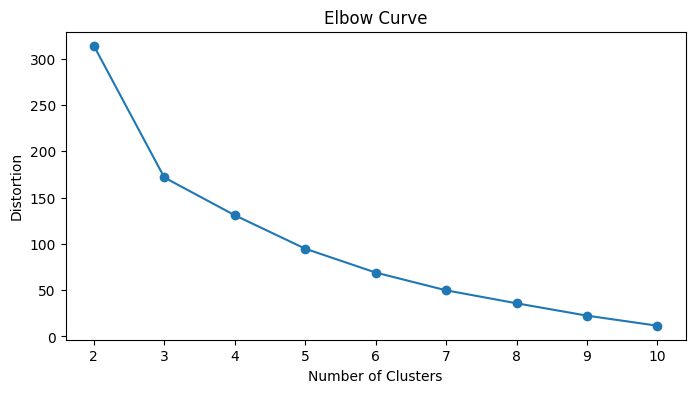

Optimal num of clusters
Enter the optimal number of clusters: 3
[1 2 2 1 0 0 0 0 0 2 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1
 1 1 2 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [547]:
clustered_df = apply_kmeans_clustering_2(x_clustering)

In [ ]:
#creating new data object for the generating graph embedding
new_x.iloc[:, 1:]
input_x = torch.tensor(new_x.iloc[:, 1:].values, dtype=torch.float)
edge_index = torch.tensor(x_mapped.iloc[:, :].values, dtype=torch.long)
data = Data(x=input_x, edge_index=edge_index.t().contiguous())
data

In [ ]:
#Splitting the data to create positive and negative edges.
#Positive edges are edges in the graph and negative edges are not present in the graph.
data.train_mask = data.val_mask = data.test_mask = None
data = train_test_split_edges(data)
data

In [ ]:
#Defining the model
class GCNEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels, cached=True) # cached only for transductive learning
        self.conv2 = GCNConv(2 * out_channels, out_channels, cached=True) # cached only for transductive learning

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

In [ ]:
#Defining the autoencoder
from torch_geometric.nn import GAE
# parameters
out_channels = 2
num_features = data.num_features
epochs = 100

# model
model = GAE(GCNEncoder(num_features, out_channels))

# move to GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
x = data.x.to(device)
train_pos_edge_index = data.train_pos_edge_index.to(device)

# inizialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(x, train_pos_edge_index)
    loss = model.recon_loss(z, train_pos_edge_index)
    loss.backward()
    optimizer.step()
    return float(loss)

def test(pos_edge_index, neg_edge_index):
    model.eval()
    with torch.no_grad():
        z = model.encode(x, train_pos_edge_index)
    return model.test(z, pos_edge_index, neg_edge_index)

In [ ]:
for epoch in range(1, epochs + 1):
    loss = train()
    auc, ap = test(data.test_pos_edge_index, data.test_neg_edge_index)
    print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))

In [ ]:
Z = model.encode(x, train_pos_edge_index)

In [ ]:
train_pos_edge_index.shape

In [ ]:
numpy_data = Z.detach().numpy()
# Step 2: Create pandas DataFrame from numpy array
df = pd.DataFrame(numpy_data)

In [ ]:
from sklearn.cluster import KMeans
def apply_kmeans_clustering(dataframe):
    # Convert the dataframe to a numpy array
    X = dataframe.values

    # Determine the best number of clusters using the elbow method
    distortions = []
    max_clusters = min(10, len(dataframe))
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, algorithm = 'lloyd', init = 'k-means++', verbose = 1, max_iter= 300)
        kmeans.fit_predict(X)
        distortions.append(kmeans.inertia_)
    print(distortions)

    # Plot the elbow curve
    plt.plot(range(2, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Curve')
    plt.show()

    # Prompt the user to input the optimal number of clusters
    num_clusters = int(input("Enter the optimal number of clusters: "))

    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit_predict(X)

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    print(labels)

    # Add the cluster labels as a new column in the dataframe
    dataframe['labels'] = labels

    # Return the updated dataframe
    return dataframe


In [ ]:
df = apply_kmeans_clustering(df)

In [ ]:
#Plotting the clustering result.
# Get unique cluster labels
unique_labels = df['labels'].unique()

# Define different colors for clusters
colors = sns.color_palette('husl', n_colors=len(unique_labels))

# Plot clusters with different colors
for i, label in enumerate(unique_labels):
  cluster_data = df[df['labels'] == label]
  plt.scatter(cluster_data[0], cluster_data[1], color=colors[i], label=f'Cluster {label}')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
# parameters
out_channels = 8
num_features = data.num_features
epochs = 50

# model
model = GAE(GCNEncoder(num_features, out_channels))

# move to GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
x = data.x.to(device)
train_pos_edge_index = data.train_pos_edge_index.to(device)

# inizialize the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
writer = SummaryWriter('runs/GAE1_experiment_'+'2d_100_epochs')

In [ ]:
for epoch in range(1, epochs + 1):
    loss = train()
    auc, ap = test(data.test_pos_edge_index, data.test_neg_edge_index)
    print('Epoch: {:03d}, AUC: {:.4f}, AP: {:.4f}'.format(epoch, auc, ap))


    writer.add_scalar('auc train',auc,epoch) # new line
    writer.add_scalar('ap train',ap,epoch)   # new line

In [ ]:
num_nodes = data.x.shape[0]

In [ ]:
class VEncoder(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(VEncoder, self).__init__()
        self.conv1 = GCNConv(in_channels, 2 * out_channels, cached=True)
        self.conv_mu = GCNConv(2 * out_channels, out_channels, cached=True)
        self.conv_logstd = GCNConv(2 * out_channels, out_channels, cached=True)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

In [ ]:
class Discriminator(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(Discriminator, self).__init__()
        self.lin1 = torch.nn.Linear(in_channels, hidden_channels)
        self.lin2 = torch.nn.Linear(hidden_channels, hidden_channels)
        self.lin3 = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = self.lin3(x)
        return x

In [ ]:
def train():
    model.train()
    encoder_optimizer.zero_grad()

    z = model.encode(data.x, data.train_pos_edge_index)

    for i in range(5):
        idx = range(num_nodes)
        discriminator.train()
        discriminator_optimizer.zero_grad()
        discriminator_loss = model.discriminator_loss(z[idx]) # Comment
        discriminator_loss.backward(retain_graph=True)
        discriminator_optimizer.step()

    loss = 0
    loss = loss + model.reg_loss(z)  # Comment

    loss = loss + model.recon_loss(z, data.train_pos_edge_index)
    loss = loss + (1 / data.num_nodes) * model.kl_loss()
    loss.backward()

    encoder_optimizer.step()

    return loss

In [ ]:
@torch.no_grad()
def test():
    model.eval()
    z = model.encode(data.x, data.train_pos_edge_index)

    # Cluster embedded values using k-means.
    kmeans_input = z.cpu().numpy()
    kmeans = KMeans(n_clusters=7, random_state=0).fit(kmeans_input)
    pred = kmeans.predict(kmeans_input)
    auc, ap = model.test(z, data.test_pos_edge_index, data.test_neg_edge_index)

    return auc, ap

In [ ]:
latent_size = 8
encoder = VEncoder(data.num_features, out_channels=latent_size)

discriminator = Discriminator(in_channels=latent_size, hidden_channels=64,
                              out_channels=1) # Comment

In [ ]:
model = ARGVA(encoder, discriminator)

device = torch.device('cuda' if torch.cuda.is_available() and use_cuda else 'cpu')
model, data = model.to(device), data.to(device)

In [ ]:
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=0.005)

In [ ]:
for epoch in range(1, 201):
    loss = train()
    auc, ap = test()
    print((f'Epoch: {epoch:03d}, Loss: {loss:.3f}, AUC: {auc:.3f}, '
           f'AP: {ap:.3f}'))

In [ ]:
Z = model.encode(x, train_pos_edge_index)

In [ ]:
Z.shape

In [455]:
#Second Challenge
def octal_division(B, A):
    def remove_leading_zeros(num):
        return num.lstrip('0') or '0'

    A = remove_leading_zeros(A)
    B = remove_leading_zeros(B)

    if A == "0":
        raise ValueError("Cannot divide by zero.")

    quotient = ""
    remainder = ""

    for digit in B:
        dividend = remainder + digit
        quotient_digit = "0"
        while int(dividend, 8) >= int(A, 8):
            dividend = oct(int(dividend, 8) - int(A, 8))[2:]
            quotient_digit = oct(int(quotient_digit, 8) + 1)[2:]

        quotient += quotient_digit
        remainder = dividend

    if quotient == "":
        quotient = "0"

    return remove_leading_zeros(quotient)



In [457]:
A = '67'
B = '12574'
C = octal_division(B, A)
C

'144'